<a href="https://colab.research.google.com/github/shivanishridhar/Data-Science-Engineering-Methods/blob/main/002770631_Shivani_Gole_Assignment_08_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Assignment - 08
#Name : Shivani Shridhar Gole
#NUID : 002770631

In [ ]:
#Import Libraries
import numpy as np
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [ ]:

# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


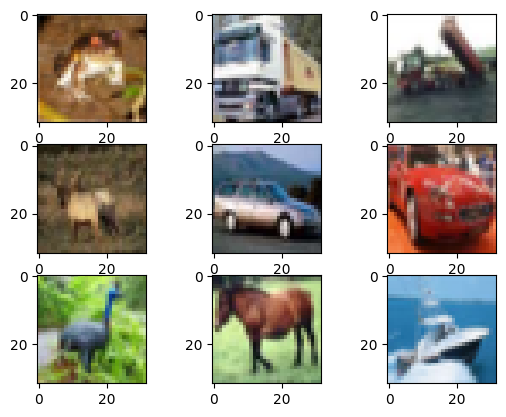

In [ ]:

# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [ ]:
# Normalize the pixel values
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Convert the labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.1)


Epoch 1/20
352/352 [==============================] - 218s 612ms/step - loss: 1.6499 - accuracy: 0.3932 - val_loss: 1.3016 - val_accuracy: 0.5310
Epoch 2/20
352/352 [==============================] - 211s 598ms/step - loss: 1.2561 - accuracy: 0.5503 - val_loss: 1.0977 - val_accuracy: 0.6118
Epoch 3/20
352/352 [==============================] - 211s 601ms/step - loss: 1.0847 - accuracy: 0.6180 - val_loss: 0.9382 - val_accuracy: 0.6666
Epoch 4/20
352/352 [==============================] - 211s 599ms/step - loss: 0.9672 - accuracy: 0.6592 - val_loss: 0.8507 - val_accuracy: 0.7040
Epoch 5/20
352/352 [==============================] - 209s 595ms/step - loss: 0.8946 - accuracy: 0.6900 - val_loss: 0.7801 - val_accuracy: 0.7324
Epoch 6/20
352/352 [==============================] - 205s 581ms/step - loss: 0.8236 - accuracy: 0.7113 - val_loss: 0.7285 - val_accuracy: 0.7468
Epoch 7/20
352/352 [==============================] - 205s 580ms/step - loss: 0.7744 - accuracy: 0.7286 - val_loss: 0.7186 -

In [ ]:
# Evaluate the model on the test set
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test accuracy:', scores[1])


313/313 [==============================] - 10s 33ms/step - loss: 0.6582 - accuracy: 0.7866
Test accuracy: 0.7865999937057495


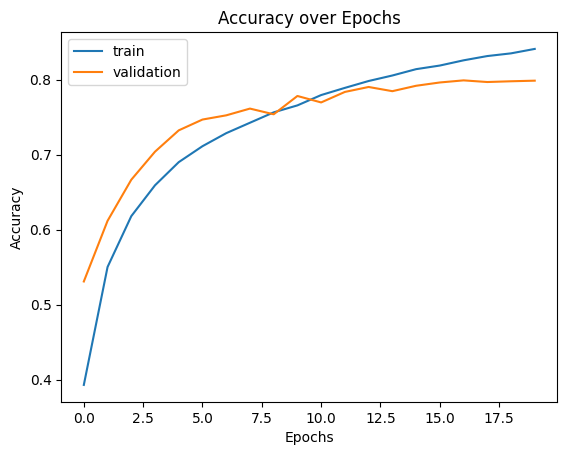

In [ ]:
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.title('Accuracy over Epochs')
pyplot.legend()
pyplot.show()

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 [==============================] - 12s 39ms/step


In [ ]:
y_true = np.argmax(y_test, axis=1)

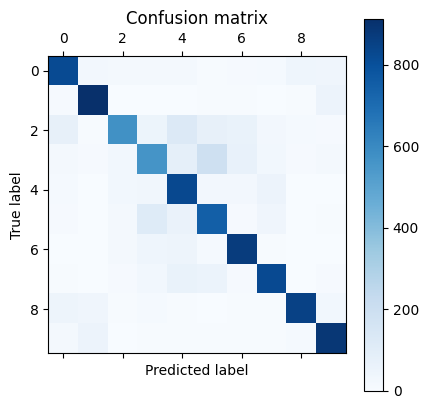

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
pyplot.matshow(confusion_mtx, cmap=pyplot.cm.Blues)
pyplot.colorbar()
pyplot.ylabel('True label')
pyplot.xlabel('Predicted label')
pyplot.title('Confusion matrix')
pyplot.show()

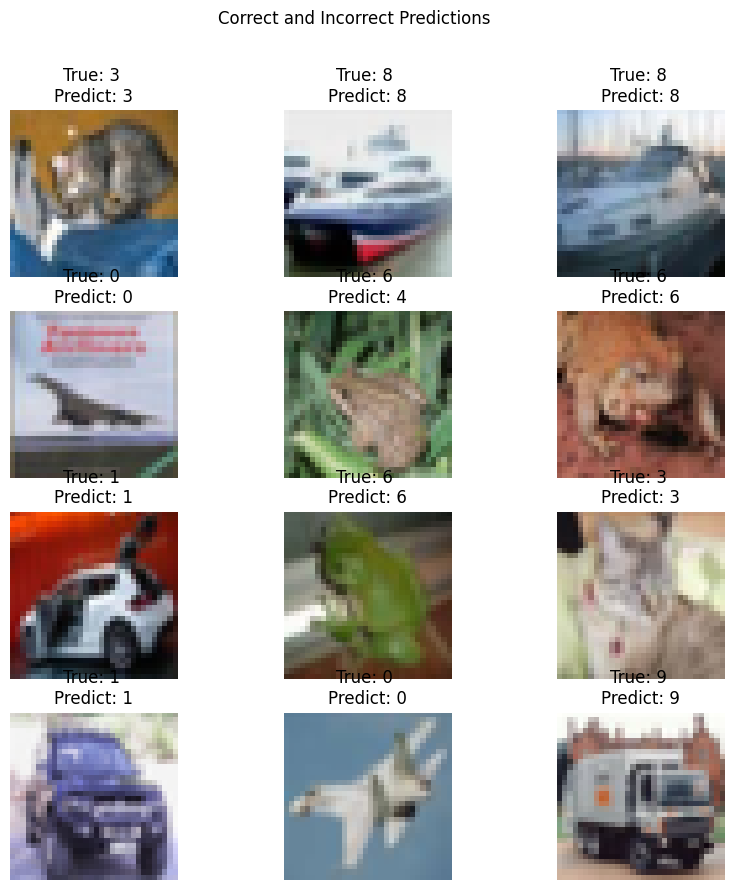

In [ ]:
num_images = 12
pyplot.figure(figsize=(10, 10))
for i in range(num_images):
    pyplot.subplot(4, 3, i+1)
    pyplot.imshow(x_test[i])
    pyplot.title('True: %s \nPredict: %s' % (y_true[i], y_pred_classes[i]))
    pyplot.axis('off')
pyplot.suptitle('Correct and Incorrect Predictions')
pyplot.show()





